In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [2]:
natgas_df=pd.read_csv('Downloads/JPquant/Nat_Gas.csv',parse_dates=['Dates'])
print(natgas_df)

        Dates  Prices
0  2020-10-31   10.10
1  2020-11-30   10.30
2  2020-12-31   11.00
3  2021-01-31   10.90
4  2021-02-28   10.90
5  2021-03-31   10.90
6  2021-04-30   10.40
7  2021-05-31    9.84
8  2021-06-30   10.00
9  2021-07-31   10.10
10 2021-08-31   10.30
11 2021-09-30   10.20
12 2021-10-31   10.10
13 2021-11-30   11.20
14 2021-12-31   11.40
15 2022-01-31   11.50
16 2022-02-28   11.80
17 2022-03-31   11.50
18 2022-04-30   10.70
19 2022-05-31   10.70
20 2022-06-30   10.40
21 2022-07-31   10.50
22 2022-08-31   10.40
23 2022-09-30   10.80
24 2022-10-31   11.00
25 2022-11-30   11.60
26 2022-12-31   11.60
27 2023-01-31   12.10
28 2023-02-28   11.70
29 2023-03-31   12.00
30 2023-04-30   11.50
31 2023-05-31   11.20
32 2023-06-30   10.90
33 2023-07-31   11.40
34 2023-08-31   11.10
35 2023-09-30   11.50
36 2023-10-31   11.80
37 2023-11-30   12.20
38 2023-12-31   12.80
39 2024-01-31   12.60
40 2024-02-29   12.40
41 2024-03-31   12.70
42 2024-04-30   12.10
43 2024-05-31   11.40
44 2024-06

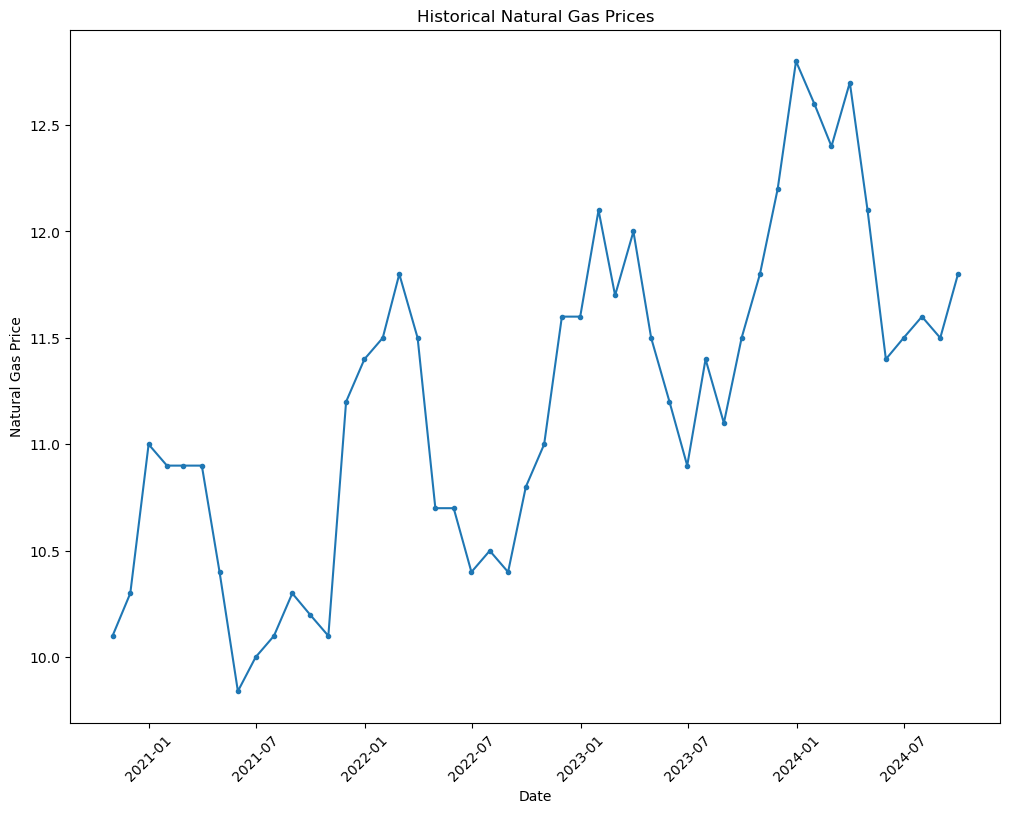

In [3]:
# Plot the historical data
plt.figure(figsize=(12, 9))
plt.plot(natgas_df['Dates'], natgas_df['Prices'], marker='.')
plt.xlabel('Date')
plt.ylabel('Natural Gas Price')
plt.title('Historical Natural Gas Prices')
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

In [4]:
def estimate_price(date):
    # Convert the input date to datetime
    date = pd.to_datetime(date)

    # Extract the month and day from the input date
    month = date.month
    day = date.day

    # Filter the data to include only the relevant month and next year
    relevant_data = natgas_df[(natgas_df['Dates'].dt.month == month) & (natgas_df['Dates'].dt.year <= date.year + 1)]

    # Linear interpolation
    price_estimate = np.interp(day, relevant_data['Dates'].dt.day, relevant_data['Prices'])

    return price_estimate
    

In [5]:
# Test the estimate_price function
input_date = '2025-05-15'
estimated_price = estimate_price(input_date)
print(f"Estimated Natural Gas Price on {input_date}: {estimated_price:.2f}")

Estimated Natural Gas Price on 2025-05-15: 9.84


In [6]:
def calculate_contract_value(injection_dates, withdrawal_dates, purchase_prices, sale_prices, injection_rate, max_volume, storage_cost_per_month):
    total_value = 0

    # Iterate through each injection and withdrawal pair
    for i in range(len(injection_dates)):
        injection_date = injection_dates[i]
        withdrawal_date = withdrawal_dates[i]
        purchase_price = purchase_prices[i]
        sale_price = sale_prices[i]

        # Calculate the time between injection and withdrawal in months
        time_months = (withdrawal_date - injection_date).days / 30.44

        # Calculate the gas cost and sale revenue
        gas_cost = purchase_price * injection_rate * time_months
        sale_revenue = sale_price * injection_rate * time_months

        # Calculate storage costs
        storage_months = (withdrawal_date - injection_date).days / 30.44
        total_storage_cost = storage_cost_per_month * storage_months

        # Calculate total cost and value
        total_cost = gas_cost + total_storage_cost
        contract_value = sale_revenue - total_cost

        # Add contract value to total
        total_value += contract_value

    return total_value

In [7]:

# Test the calculate_contract_value function
injection_dates = [pd.to_datetime('2023-05-15'), pd.to_datetime('2023-06-15')]
withdrawal_dates = [pd.to_datetime('2023-09-15'), pd.to_datetime('2023-11-15')]
purchase_prices = [2.5, 2.6]  # $/MMBtu
sale_prices = [3.5, 3.6]  # $/MMBtu
injection_rate = 1000000  # MMBtu
max_volume = 5000000  # MMBtu
storage_cost_per_month = 100000  # $

contract_value = calculate_contract_value(injection_dates, withdrawal_dates, purchase_prices, sale_prices, injection_rate, max_volume, storage_cost_per_month)
print(f"Estimated Contract Value: ${contract_value:.2f}")

Estimated Contract Value: $8160315.37


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [9]:
data= pd.read_csv('Downloads/JPquant/Task 3 and 4_Loan_Data.csv')
print(data.head())

   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0  


In [10]:
#split data into features(X) and target(y)
X= data.drop(['customer_id','default'], axis=1)
y= data['default']

# Split the data into training and testing sets
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

#standardiez the features
scaler=          StandardScaler()
X_train_scaled=  scaler.fit_transform(X_train)
X_test_scaled=   scaler.transform(X_test)

#train model
logreg_model= LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

lrreg_model= LinearRegression()
lrreg_model.fit(X_train_scaled, y_train)

rfc_model= RandomForestClassifier()
rfc_model.fit(X_train_scaled, y_train)

dtc_model= DecisionTreeClassifier()
dtc_model.fit(X_train_scaled, y_train)

#Evaluate models on the test set

logreg_model_pred=  logreg_model.predict(X_test_scaled)
lrreg_model_pred=   (lrreg_model.predict(X_test_scaled)>=0.5).astype(int)
rfc_model_pred=     rfc_model.predict(X_test_scaled)
dtc_model_pred=     dtc_model.predict(X_test_scaled)


logreg_model_accuracy= accuracy_score(y_test,logreg_model_pred)
lrreg_model_accuracy=  accuracy_score(y_test,lrreg_model_pred)
rfc_model_accuracy=    accuracy_score(y_test,rfc_model_pred)
dtc_model_accuracy=    accuracy_score(y_test,dtc_model_pred)

logreg_model_confusion_matrix= confusion_matrix(y_test,logreg_model_pred)
lrreg_model_confusion_matrix = confusion_matrix(y_test,lrreg_model_pred)
rfc_model_confusion_matrix=    confusion_matrix(y_test, rfc_model_pred)
dtc_model_confusion_matrix =    confusion_matrix(y_test, dtc_model_pred)

print("Logistic Regression Accuracy:", logreg_model_accuracy)
print("Random Forest Accuracy:", lrreg_model_accuracy)
print("Simple Linear Regression Accuracy:", rfc_model_accuracy)
print("Decision Tree Accuracy:", dtc_model_accuracy)

print("Logistic Regression Confusion Matrix:\n", logreg_model_confusion_matrix)
print("Random Forest Confusion Matrix:\n", lrreg_model_confusion_matrix)
print("Simple Linear Regression Confusion Matrix:\n", rfc_model_confusion_matrix)
print("Decision Tree Confusion Matrix:\n", dtc_model_confusion_matrix)

Logistic Regression Accuracy: 0.9955
Random Forest Accuracy: 0.9865
Simple Linear Regression Accuracy: 0.994
Decision Tree Accuracy: 0.994
Logistic Regression Confusion Matrix:
 [[1651    1]
 [   8  340]]
Random Forest Confusion Matrix:
 [[1627   25]
 [   2  346]]
Simple Linear Regression Confusion Matrix:
 [[1649    3]
 [   9  339]]
Decision Tree Confusion Matrix:
 [[1645    7]
 [   5  343]]


In [12]:
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error

#predict default probalities on the test set
default_prob = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Get FICO scores from the test set
fico_scores = X_test['fico_score']

#calculate mean squared error for different bucket boundaries
mse_values=[]
num_buckets =5 

for i in range(1, num_buckets):
        bucket_boundaries = np.percentile(fico_scores, np.linspace(0, 100, i + 1))
        bucket_predictions = [default_prob[(fico_scores >= bucket_boundaries[j]) & (fico_scores <= bucket_boundaries[j + 1])].mean() for j in range(i)]
        mse = mean_squared_error(bucket_predictions, y_test[:len(bucket_predictions)])  # Ensure lengths match
        mse_values.append((i, mse))
        
#find optimal number of buckets with minimum MSE  
optimal_num_buckets= min(mse_values, key=lambda x: x[1])[0]
print("Optimal Number of Buckets:", optimal_num_buckets)

# Calculate bucket boundaries based on the optimal number of buckets

optimal_bucket_boundaries = np.percentile(fico_scores, np.linspace(0, 100, optimal_num_buckets + 1))
print("Optimal Bucket Boundaries:", optimal_bucket_boundaries)

# Calculate log-likelihood values for different bucket boundaries
log_likelihood_values = []
num_buckets = 5  # You can adjust the number of buckets

for i in range(1, num_buckets):
    bucket_boundaries = np.percentile(fico_scores, np.linspace(0, 100, i + 1))
    bucket_indices = np.digitize(fico_scores, bucket_boundaries) - 1

    bucket_probabilities = [default_prob[bucket_indices == j].mean() for j in range(i)]
    bucket_defaults = [y_test[bucket_indices == j].sum() for j in range(i)]
    bucket_total = [len(y_test[bucket_indices == j]) for j in range(i)]
    bucket_likelihood = sum([(default * np.log(prob) + (total - default) * np.log(1 - prob)) for default, prob, total in zip(bucket_defaults, bucket_probabilities, bucket_total)])

    log_likelihood_values.append((i, bucket_likelihood))
    
# Find the optimal number of buckets with maximum log-likelihood
optimal_num_buckets = max(log_likelihood_values, key=lambda x: x[1])[0]
print("Optimal Number of Buckets (Log-Likelihood):", optimal_num_buckets)

# Calculate bucket boundaries based on the optimal number of buckets
optimal_bucket_boundaries = np.percentile(fico_scores, np.linspace(0, 100, optimal_num_buckets + 1))


print("Optimal Bucket Boundaries (Log-Likelihood):", optimal_bucket_boundaries)


Optimal Number of Buckets: 1
Optimal Bucket Boundaries: [425. 831.]
Optimal Number of Buckets (Log-Likelihood): 3
Optimal Bucket Boundaries (Log-Likelihood): [425.         613.         664.66666667 831.        ]
